In [16]:
import pandas as pd
import re

In [31]:
df = pd.read_csv('../data_clean.csv')

In [38]:
country_mapping = {
    'UK': 'GBR',
    'United Kingdom': 'GBR',
    'France': 'FRA',
    'Italy': 'ITA',
    'Spain': 'ESP',
    'Belgium': 'BEL',
    'Netherlands': 'NDL',
    'Nederland': 'NDL',
    'Dutch': 'NDL',
    'Dubai': 'UAE',
    'UAE': 'UAE',
    'Germany': 'DEU',
    'Deutschland': 'DEU',
    'Denmark': 'DNK',
    'Austria': 'AUT',
    'Czech': 'CZE',
    'default': 'Not available'
}

country_names = ['UK', 'United Kingdom', 'France', 'Italy', 'Spain', 
                 'Belgium', 'Netherlands', 'Nederland', 'Dutch', 'Dubai', 'UAE',
                'Germany', 'Deutschland', 'Denmark', 'Austria', 'Czech']


def identify_countries(df: pd.DataFrame):
    regex_pattern = '|'.join([f'{key_word}' for key_word in country_names])  # Create regex pattern
    search_space = df['title'] + df['description'] + df['job_highlights']
    countries = search_space.map(lambda x: country_mapping['default'] if len(re.findall(regex_pattern, x)) == 0
                                else country_mapping[re.findall(regex_pattern, x)[0]])
    df['country'] = countries
    return df


df = identify_countries(df)
df.head(5)

,Unnamed: 0,title,company_name,location,via,description,job_highlights,detected_extensions,job_id,salary,...,Teamwork,Time_series_analysis,Unsupervised_learning,UX_design,Visualization,Web_development,XML,YAML,YARN,country
0,0,Junior Data Scientist,ING,Amsterdam,ING Careers,As the data driven mindset is more and more em...,As the data driven mindset is more and more em...,"{'posted_at': '6 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBTY2llbnRpc3...,Not available,...,0,0,0,0,1,0,0,0,0,NDL
1,1,"JUNIOR DATA SCIENTIST - Dubai, UAE",Cobblestone Energy,Utrecht,LinkedIn,"Location: Dubai, UAE (We provide visa sponsors...","Location: Dubai, UAE (We provide visa sponsors...","{'posted_at': '4 hours ago', 'schedule_type': ...",eyJqb2JfdGl0bGUiOiJKVU5JT1IgREFUQSBTQ0lFTlRJU1...,60000,...,0,0,0,0,1,0,0,0,0,UAE
2,2,Data Scientist Mobiliteit,TNO,The Hague,TNO,Halen we in Nederland de klimaatdoelen op het ...,Halen we in Nederland de klimaatdoelen op het ...,"{'posted_at': '5 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCBNb2JpbG...,Not available,...,0,0,0,0,0,0,0,0,0,NDL
3,3,Data Scientist Real Estate for Catella Investm...,Catella Investment Management Benelux,Maastricht,Limburgvac,As a Data Scientist in the Research & Investme...,As a Data Scientist in the Research & Investme...,"{'posted_at': '20 hours ago', 'schedule_type':...",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCBSZWFsIE...,Not available,...,0,0,0,0,0,0,0,0,0,Not available
4,4,Data Scientist,Effectory,Amsterdam,Effectory Jobs,Improving the working lives of millions of peo...,Improving the working lives of millions of peo...,{'schedule_type': 'Full–time'},eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCIsImh0aW...,68750.0,...,0,0,0,0,1,0,0,0,0,NDL


In [80]:
country_coordinate_mapping = {
    'GBR': {'latitude': 51.509865, 'longitude': -0.118092},
    'FRA': {'latitude': 48.864716, 'longitude': 2.349014},
    'ITA': {'latitude': 41.902782, 'longitude': 12.496366},
    'ESP': {'latitude': 40.416775, 'longitude': -3.703790},
    'BEL': {'latitude': 51.260197, 'longitude': 4.402771},
    'NDL': {'latitude': 52.370216, 'longitude': 4.895168},
    'UAE': {'latitude': 25.276987, 'longitude': 55.296249},
    'DEU': {'latitude': 52.520008, 'longitude': 13.404954},
    'DNK': {'latitude': 55.676098, 'longitude': 12.568337},
    'AUT': {'latitude': 48.210033, 'longitude': 16.363449},
    'CZE': {'latitude': 50.073658, 'longitude': 14.418540},
    'Not available': {'latitude': 'Not available', 'longitude': 'Not available'},
}

country_count = df['country'].value_counts()
country_count = pd.DataFrame(data=country_count).reset_index()
country_count.columns = ['country', 'listing_count']

def map_country_to_coordinate(x):
    latitude = country_coordinate_mapping[x]['latitude']
    longitude = country_coordinate_mapping[x]['longitude']
    return pd.Series([latitude, longitude])

country_count[['latitude', 'longitude']] = country_count['country'].apply(map_country_to_coordinate)

country_count = country_count[country_count.country != "Not available"]
country_count.head(11)

,country,listing_count,latitude,longitude
1,NDL,298,52.370216,4.895168
2,GBR,115,51.509865,-0.118092
3,DEU,86,52.520008,13.404954
4,FRA,71,48.864716,2.349014
5,ITA,61,41.902782,12.496366
6,UAE,55,25.276987,55.296249
7,ESP,48,40.416775,-3.70379
8,DNK,36,55.676098,12.568337
9,BEL,35,51.260197,4.402771
10,AUT,28,48.210033,16.363449


In [75]:
# !pip install geopandas
import matplotlib.pyplot as plt
import geopandas as gpd

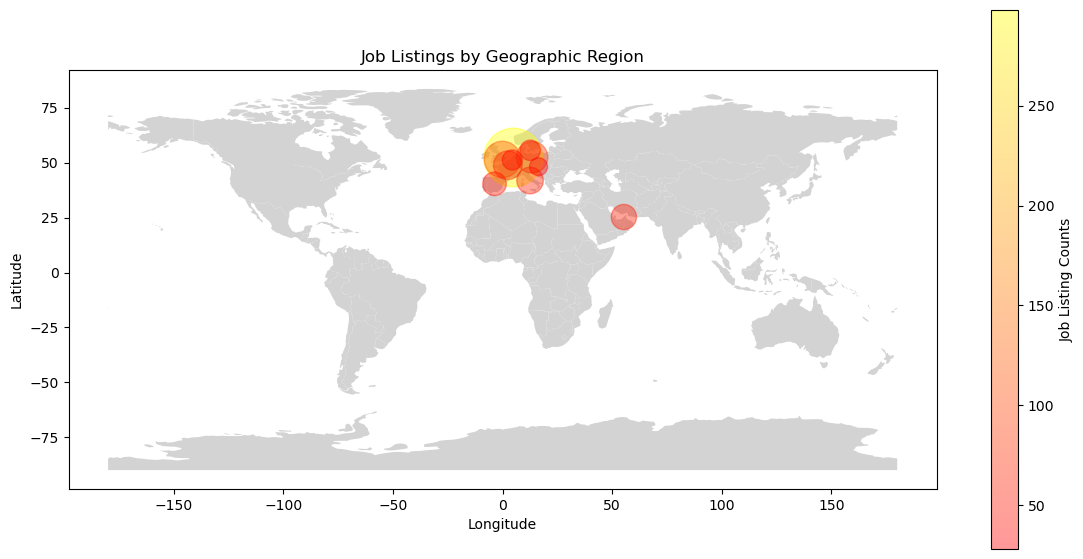

In [87]:
## Inspiration: https://towardsdatascience.com/easiest-way-to-plot-on-a-world-map-with-pandas-and-geopandas-325f6024949f ##

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fix, ax = plt.subplots(figsize=(14, 7))
worldmap.plot(color="lightgrey", ax=ax)

lat = country_count['latitude']
long = country_count['longitude']
listing_count = country_count['listing_count']

plt.scatter(x=long, y=lat, s=listing_count * 6, c=listing_count, alpha=0.4, cmap='autumn')
plt.colorbar(label='Job Listing Counts')

plt.title('Job Listings by Geographic Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()